# 철강데이터 분석
- PLATE_NO              플렌트 고유 ID
- ROLLING_DATE          제작일자
- SCALE                 양품/불량
- SPEC                  SPEC
- STEEL_KIND            종류
- PT_THK                두께
- PT_WDTH               너비
- PT_LTH                길이
- PT_WGT                무게
- FUR_NO                생산시설 NO
- FUR_NO_ROW            생산시설 ROW
- FUR_HZ_TEMP           가열로_HZ가열로_온도
- FUR_HZ_TIME           가열로_HZ가열로_시간
- FUR_SZ_TEMP           가열로_SZ가열로_온도
- FUR_SZ_TIME           가열로_SZ가열로_시간
- FUR_TIME              가열로_내부에 있었던 시간
- FUR_EXTEMP            가열로_추출온도
- ROLLING_TEMP_T5       롤링_온도
- HSB                   HSB 적용여부
- ROLLING_DESCALING     ROLLING_DESCALING 작업 횟수
- WORK_GR               작업그룹

In [1]:
import pandas as pd
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import platform
# 운영체제별 한글 폰트 설정

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('eda_data.csv')
df = df.drop(["Unnamed: 0"], axis = 1)
df.head(20)

,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,...,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,Year,Hour,SPEC_SIZE
0,2008-08-01:00:00:15,1,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,...,59,282,1133,934,1,8,2조,2008-08-01,새벽,AB/EH32
1,2008-08-01:00:00:16,1,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,...,53,283,1135,937,1,8,2조,2008-08-01,새벽,AB/EH32
2,2008-08-01:00:00:59,1,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,...,55,282,1121,889,1,8,3조,2008-08-01,새벽,NV
3,2008-08-01:00:01:24,1,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,...,68,316,1127,885,1,8,3조,2008-08-01,새벽,NV
4,2008-08-01:00:01:44,1,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,...,48,314,1128,873,1,8,1조,2008-08-01,새벽,BV
5,2008-08-01:00:02:06,1,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,2,...,57,314,1128,874,1,8,4조,2008-08-01,새벽,BV
6,2008-08-01:00:02:28,1,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,1,...,50,289,1130,878,1,8,2조,2008-08-01,새벽,BV
7,2008-08-01:00:02:21,1,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,2,...,52,294,1131,870,1,8,4조,2008-08-01,새벽,BV
8,2008-08-01:00:02:51,1,BV-EH36-TM,T8,38.33,3099,16719,15590,2호기,1,...,52,293,1122,873,1,8,1조,2008-08-01,새벽,BV
9,2008-08-01:00:03:15,1,COMMON,T8,38.43,3129,16187,15280,2호기,2,...,73,298,1124,881,1,8,4조,2008-08-01,새벽,COMMON


In [3]:
df['SPEC'].nunique()

66

In [4]:
df['SPEC_SIZE'].nunique()

23

## 불량률 분석
- 0 : 불량
- 1 : 양품

Text(0.5, 1.0, 'Count plot - 불량수')

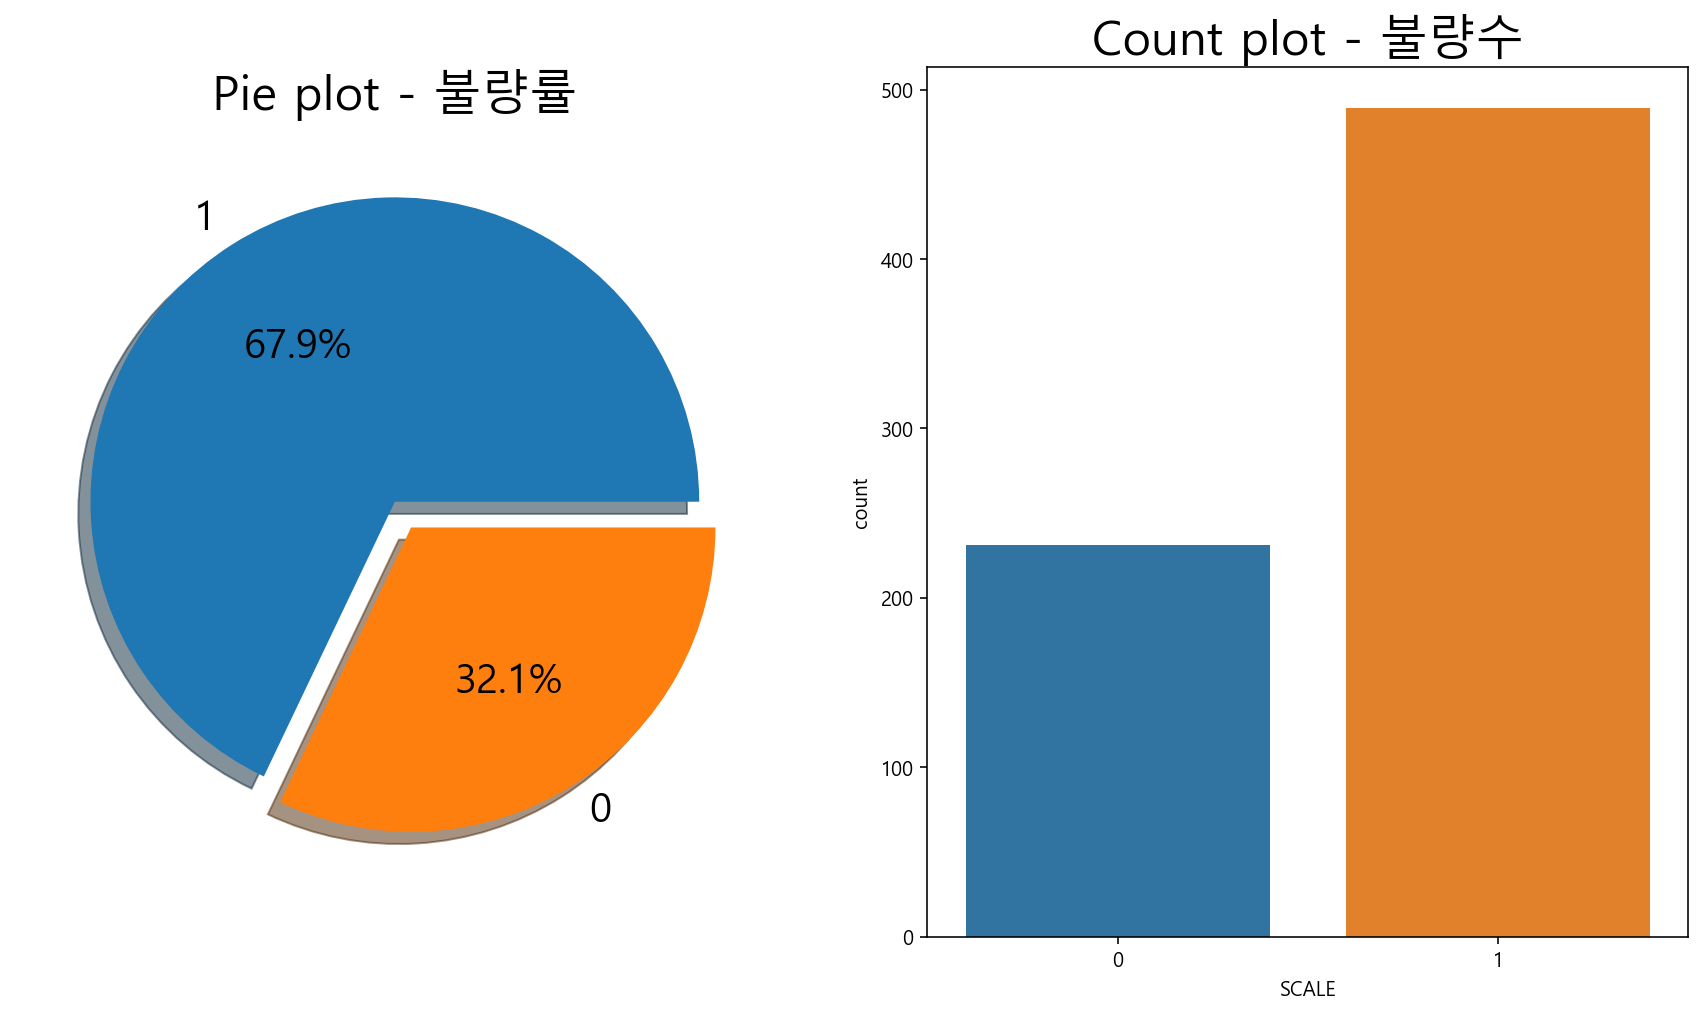

In [5]:
## 문제점 제기 할 때 사용.

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
plt.rc('font', size=20)
# 폰트크기

df['SCALE'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax = ax[0], shadow=True)
ax[0].set_title('Pie plot - 불량률')
ax[0].set_ylabel('')
sns.countplot( data=df, x = 'SCALE', ax=ax[1])
ax[1].set_title('Count plot - 불량수')

# 32% 이상
# 불량을 줄여야 된다. 어떤게 영향을 미칠지

## 호기별 생산 시각화

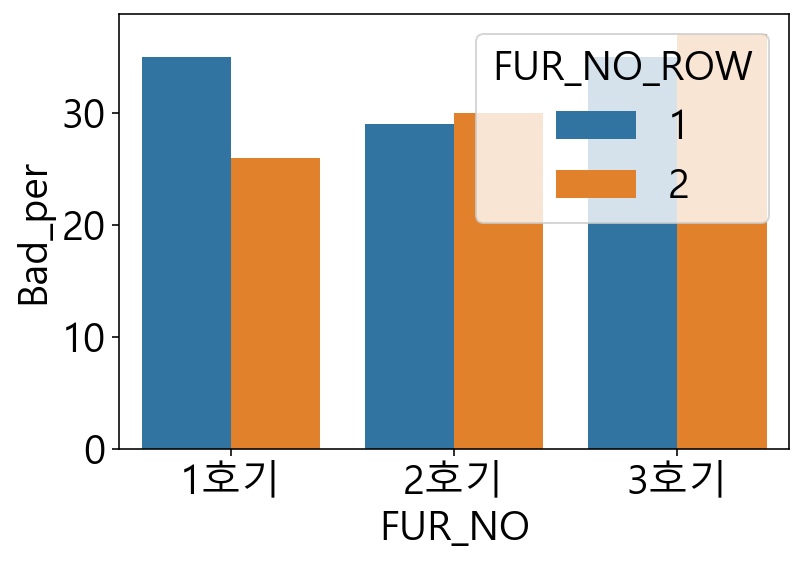

In [6]:
# 호기별 슬레이싱
FN_1 = df[df.copy().loc[:,'FUR_NO'] == '1호기'] # 1호기
FN_2 = df[df.copy().loc[:,'FUR_NO'] == '2호기'] # 2호기
FN_3 = df[df.copy().loc[:,'FUR_NO'] == '3호기'] # 3호기

# 호기별 불량 슬레이싱
FN_1_B = FN_1[FN_1['SCALE'] == 0] # 1호기
FN_2_B = FN_2[FN_2['SCALE'] == 0] # 2호기
FN_3_B = FN_3[FN_3['SCALE'] == 0] # 3호기

# 1호기 불량/양품/총 별 Groupby
FN_1_GS = FN_1.groupby(['FUR_NO', 'FUR_NO_ROW'], as_index = False).agg(Good_count = ('SCALE', 'sum')) # 양품
FN_1_BS = FN_1_B.groupby(['FUR_NO', 'FUR_NO_ROW'], as_index = False).agg(Bad_count = ('SCALE', 'count')) # 불량
FN_1_TS = FN_1.groupby(['FUR_NO', 'FUR_NO_ROW'], as_index = False).agg(Total_count = ('SCALE', 'count')) # 총량

# 2호기 불량/양품/총 별 Groupby
FN_2_GS = FN_2.groupby(['FUR_NO', 'FUR_NO_ROW'], as_index = False).agg(Good_count = ('SCALE', 'sum')) # 양품
FN_2_BS = FN_2_B.groupby(['FUR_NO', 'FUR_NO_ROW'], as_index = False).agg(Bad_count = ('SCALE', 'count')) # 불량
FN_2_TS = FN_2.groupby(['FUR_NO', 'FUR_NO_ROW'], as_index = False).agg(Total_count = ('SCALE', 'count')) # 총량

# 3호기 불량/양품/총 별 Groupby
FN_3_GS = FN_3.groupby(['FUR_NO', 'FUR_NO_ROW'], as_index = False).agg(Good_count = ('SCALE', 'sum')) # 양품
FN_3_BS = FN_3_B.groupby(['FUR_NO', 'FUR_NO_ROW'], as_index = False).agg(Bad_count = ('SCALE', 'count')) # 불량
FN_3_TS = FN_3.groupby(['FUR_NO', 'FUR_NO_ROW'], as_index = False).agg(Total_count = ('SCALE', 'count')) # 총량

# 1호기 종합
FN_1_SC = FN_1_BS.merge(FN_1_GS, on = ['FUR_NO', 'FUR_NO_ROW'])
FN_1_SC = FN_1_SC.merge(FN_1_TS, on = ['FUR_NO', 'FUR_NO_ROW'])

# 2호기 종합
FN_2_SC = FN_2_BS.merge(FN_2_GS, on = ['FUR_NO', 'FUR_NO_ROW'])
FN_2_SC = FN_2_SC.merge(FN_2_TS, on = ['FUR_NO', 'FUR_NO_ROW'])

# 3호기 종합
FN_3_SC = FN_3_BS.merge(FN_3_GS, on = ['FUR_NO', 'FUR_NO_ROW'])
FN_3_SC = FN_3_SC.merge(FN_3_TS, on = ['FUR_NO', 'FUR_NO_ROW'])

# 총 종합
FN_SC = pd.concat([FN_1_SC, FN_2_SC, FN_3_SC])

# Bad_per 계산 추가
FN_SC['Bad_per'] = round(FN_SC['Bad_count'] / FN_SC['Total_count'] * 100, 0)

# 호기별 불량률 생산 시각화
graph_FN_SC_B = sns.barplot(data = FN_SC, x= 'FUR_NO', y = 'Bad_per', hue = 'FUR_NO_ROW')

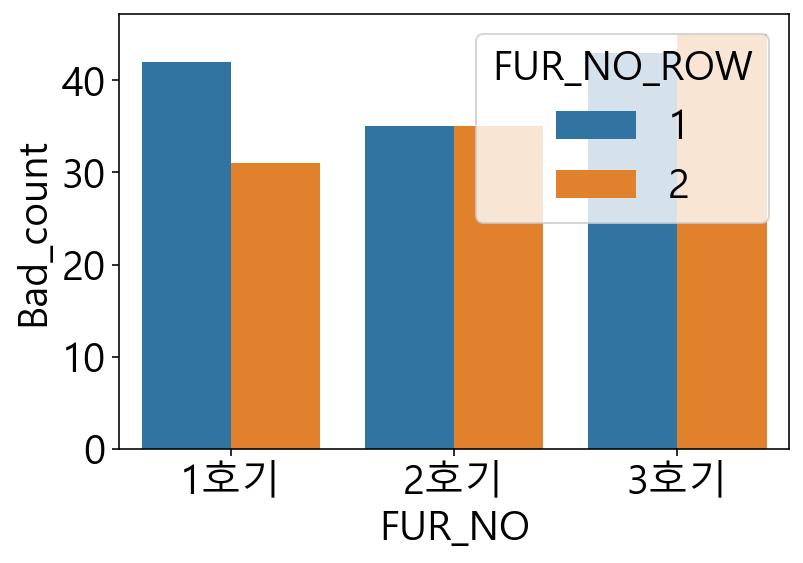

In [7]:
# 호기별 불량 생산 시각화

graph_FN_SC_B = sns.barplot(data = FN_SC, x= 'FUR_NO', y = 'Bad_count', hue = 'FUR_NO_ROW')

# 여러가지 변수를 확인해봐야된다.
# ROW별로 인지? 아니면 다른 변수떄문인지? 최종적으로 어떤 변수가 불량을 많이 내는지 찾아보는 과정(근거!)
# 시간데이터 오전 오후 야간 시간데이터 만들어서 호기 별 상황 확인하기 -> 전체 나온것중에 불량률
# 호기랑 work group 합쳐서 인사이트 도출

In [8]:
df.groupby(['FUR_NO','Hour']).agg(Fug_count = ('ROLLING_DATE', 'count'))

Fug_count
FUR_NO Hour           
1호기    새벽           51
       오전           97
       오후           63
       저녁           29
2호기    새벽           48
       오전           96
       오후           65
       저녁           28
3호기    새벽           52
       오전           93
       오후           68
       저녁           30

## 철강 종류별 불량률

In [9]:
steel_scale = df.groupby('STEEL_KIND').agg(양품정도 = ('SCALE', 'sum')).reset_index()
steel_total_scale = df.groupby('STEEL_KIND').agg(양품퍼센트 = ('SCALE', 'count')).reset_index()

steel_total_scale

,STEEL_KIND,양품퍼센트
0,C0,503
1,C1,1
2,C3,7
3,T0,16
4,T1,18
5,T3,2
6,T5,43
7,T7,35
8,T8,95


Text(0.5, 1.0, '철강 죵류에 따른 양품정도')

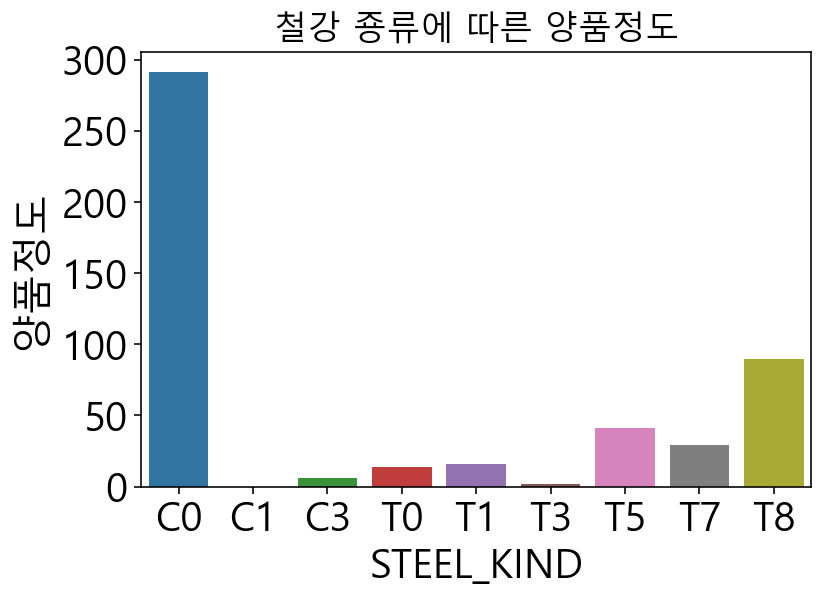

In [10]:
fig = plt.subplot()
plt.rc('font', size = 14)

sns.barplot(data = steel_scale, x = 'STEEL_KIND', y = '양품정도')
fig.set_title('철강 죵류에 따른 양품정도')

# C0가 압도적으로 양품이 많다. 양품이 많지만 불량률이 중요한 것 같기에 불량률 계산
# C0 제외하고 Total이 얼마나 될지 확인해서 보여주는 것 있으면 좋을 것 같다.

<AxesSubplot:xlabel='STEEL_KIND', ylabel='양품퍼센트'>

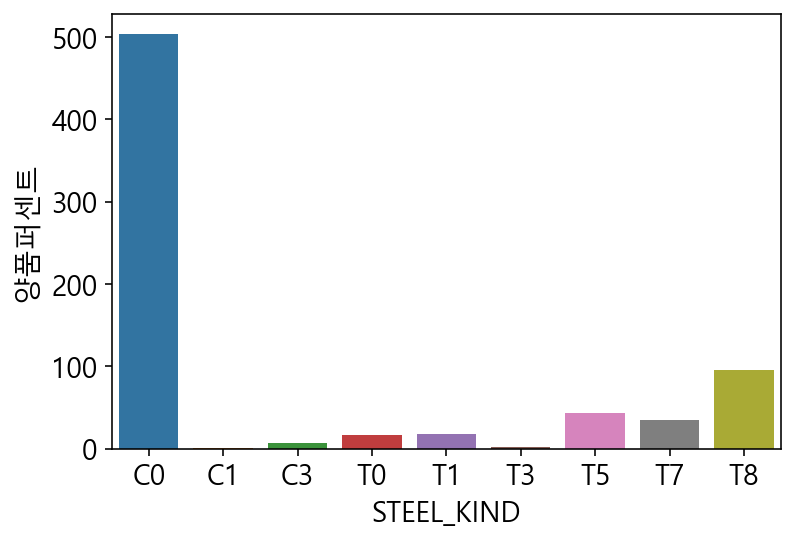

In [11]:
sns.barplot(data = steel_total_scale, x = 'STEEL_KIND', y = '양품퍼센트')

In [12]:
# 불량률 퍼센트 만들기

steel_scale['양품퍼센트'] = steel_scale['양품정도'] / steel_total_scale['양품퍼센트'] * 100
steel_scale['불량퍼센트'] = 100 - steel_scale['양품퍼센트']
steel_scale

,STEEL_KIND,양품정도,양품퍼센트,불량퍼센트
0,C0,291,57.852883,42.147117
1,C1,0,0.000000,100.000000
2,C3,6,85.714286,14.285714
3,T0,14,87.500000,12.500000
4,T1,16,88.888889,11.111111
5,T3,2,100.000000,0.000000
6,T5,41,95.348837,4.651163
7,T7,29,82.857143,17.142857
8,T8,90,94.736842,5.263158


In [13]:
#C0 총량과 나머지 총량 비교

steel_kind_c0 = df[df['STEEL_KIND'] == 'C0']
steel_kind_c0_coount = len(steel_kind_c0)

steel_diif_c0 = df[df['STEEL_KIND'] != 'C0']
steel_diif_c0_count = len(steel_diif_c0)
steel_diif_c0_count

217

Text(0.5, 1.0, '철강 종류(C0 이외)에 따른 불량 비교')

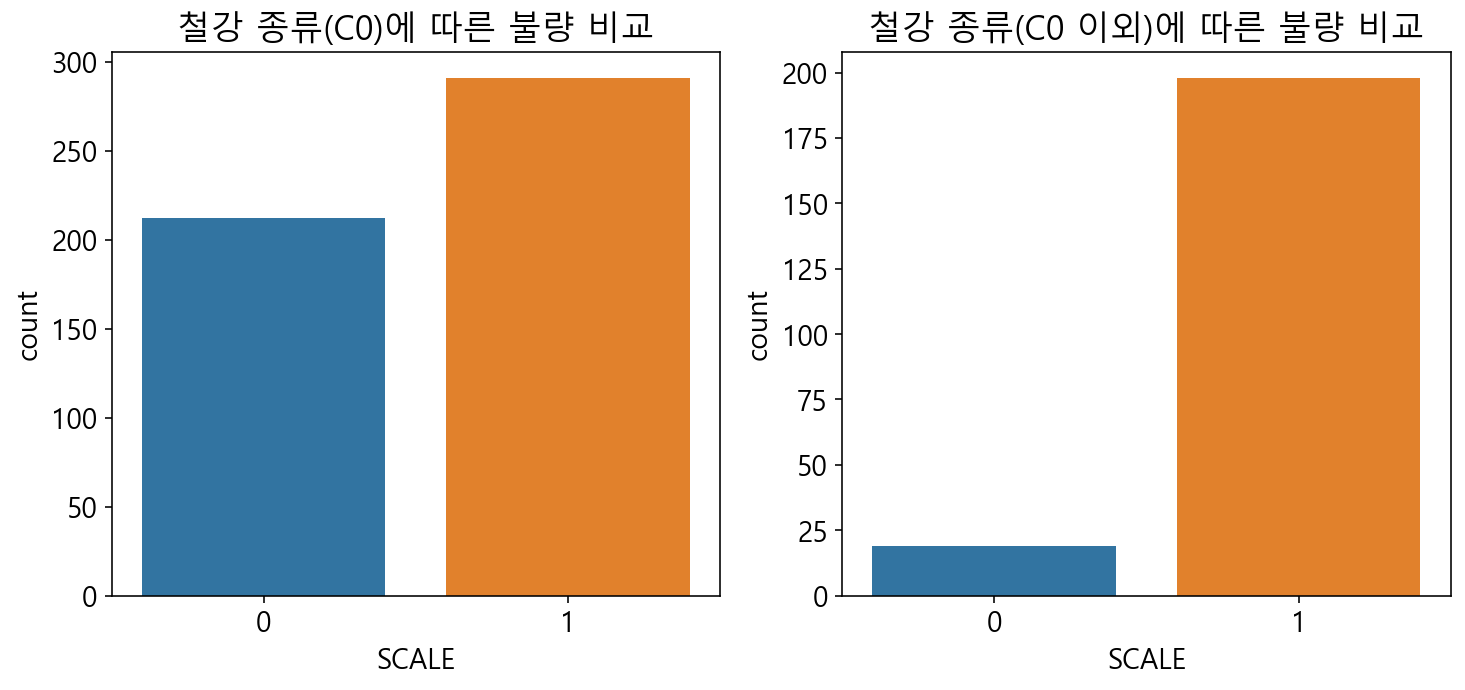

In [14]:
fig, ax = plt.subplots(1, 2,  figsize=(12, 5))
plt.rc('font', size = 14)

sns.countplot(data = steel_kind_c0, x = 'SCALE', ax = ax[0])
ax[0].set_title('철강 종류(C0)에 따른 불량 비교')

sns.countplot(data = steel_diif_c0, x = 'SCALE', ax = ax[1])
ax[1].set_title('철강 종류(C0 이외)에 따른 불량 비교')

Text(0.5, 1.0, '철강 종류에 따른 불량확률')

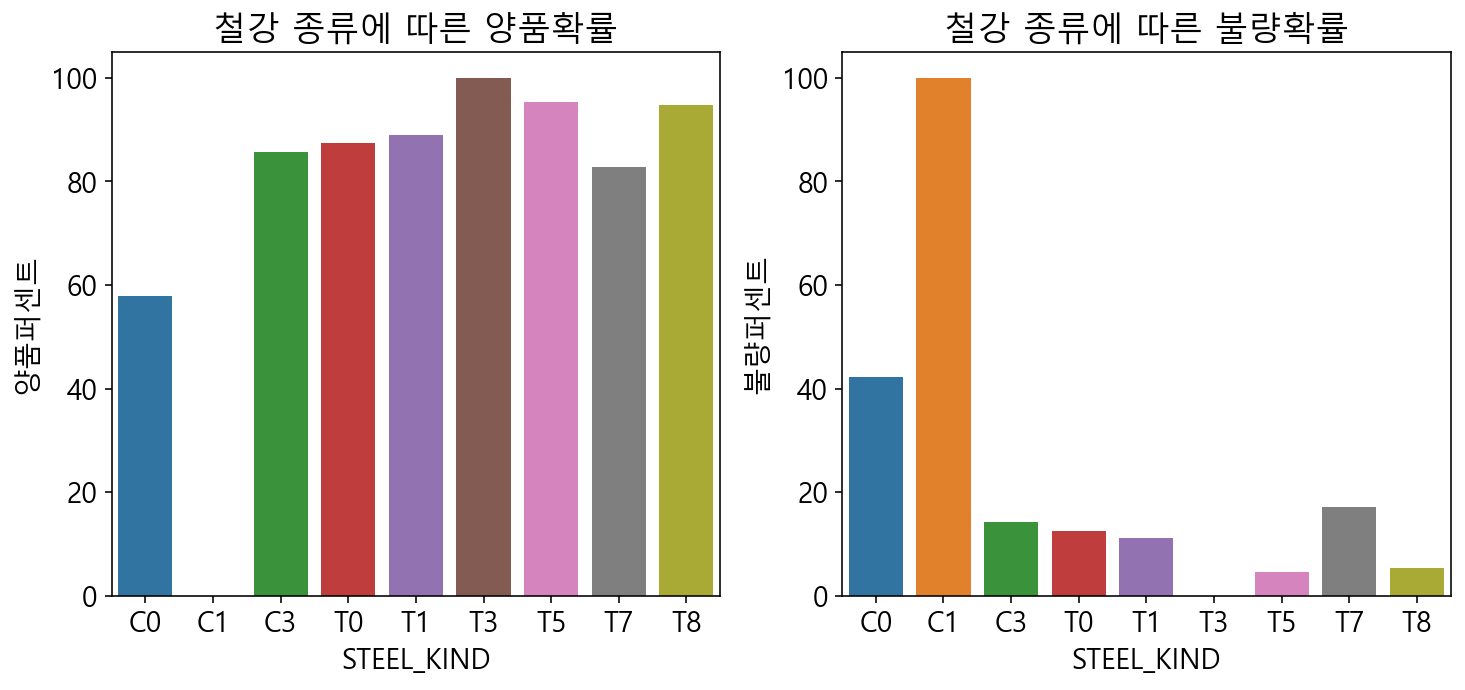

In [15]:
fig, ax = plt.subplots(1, 2,  figsize=(12, 5))

sns.barplot(data = steel_scale, x = 'STEEL_KIND', y = '양품퍼센트', ax = ax[0])
ax[0].set_title('철강 종류에 따른 양품확률')

sns.barplot(data = steel_scale, x = 'STEEL_KIND', y = '불량퍼센트', ax = ax[1])
ax[1].set_title('철강 종류에 따른 불량확률')


# 개수로는 양품이 C0 이많았지만, 결과적으로는 양품이 나오는 확률이 적다.
# 오히려 T3, T5, T8가 양품이 개수가 많지 않지만.
# C0을 제작을 제일 많이하지만 그만큼 불량율도 높다.

### 시간별 철강종류 C0 불량률

In [16]:
c0_data = df[df['STEEL_KIND'] == 'C0']
c0_hours = c0_data.groupby('Hour').agg(hour_scale = ('SCALE', 'sum'))
c0_total = c0_data.groupby('Hour').agg(total = ('SCALE', 'count')).reset_index()
c0_hours['Perent'] = 100 - (c0_hours['hour_scale'] / c0_total['total'] * 100)
c0_hours= c0_hours.rename(columns = {'Perent' : 'Percent'})
c0_total

,Hour,total
0,새벽,20
1,오전,281
2,오후,193
3,저녁,9


<AxesSubplot:xlabel='Hour', ylabel='total'>

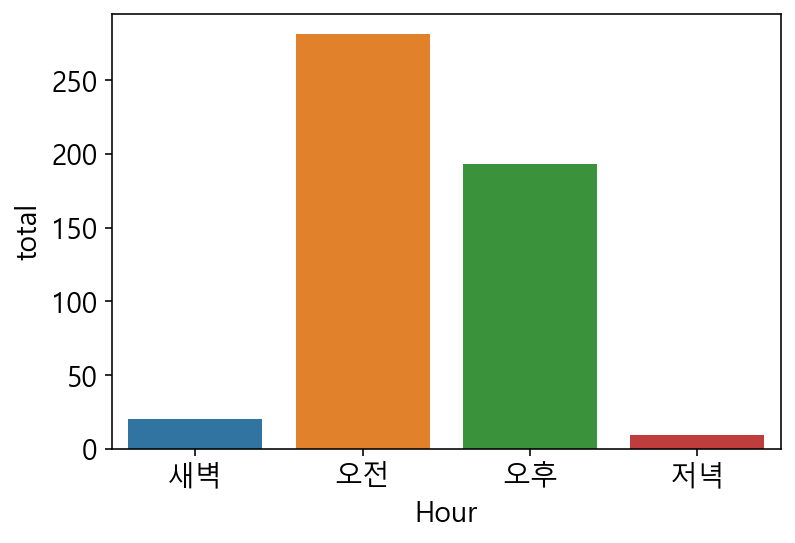

In [17]:
sns.barplot(data = c0_total, x = 'Hour', y = 'total')

Text(0.5, 1.0, '시간별 C0 불량률')

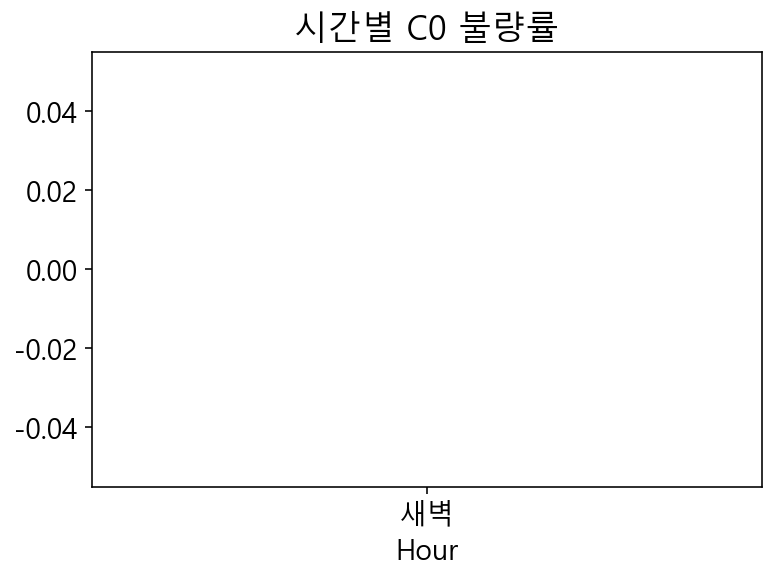

In [18]:
fig = plt.subplot()

sns.lineplot(data = c0_hours, x = 'Hour', y = 'Percent')
fig.set_title("시간별 C0 불량률")

### 시간별 철강종류(C0) 이외 불량률

In [19]:
c0_diff = df[df['STEEL_KIND'] != 'C0']
c0_diif_scale = c0_diff.groupby('Hour').agg(c0_diif_scale = ('SCALE', 'sum'))

total = c0_diff.groupby('Hour').agg(total = ('SCALE', 'count')).reset_index()

c0_diif_scale['bad_percent'] = 100 - (c0_diif_scale['c0_diif_scale'] / total['total'] * 100)
c0_diif_scale
total

,Hour,total
0,새벽,131
1,오전,5
2,오후,3
3,저녁,78


<AxesSubplot:xlabel='Hour', ylabel='total'>

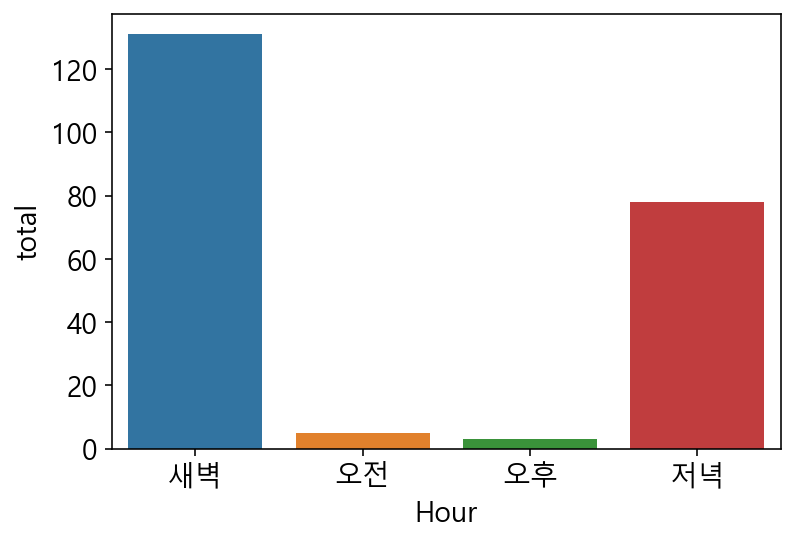

In [20]:
sns.barplot(data = total, x = 'Hour', y = 'total')

Text(0.5, 1.0, '시간별 C0 외 불량률')

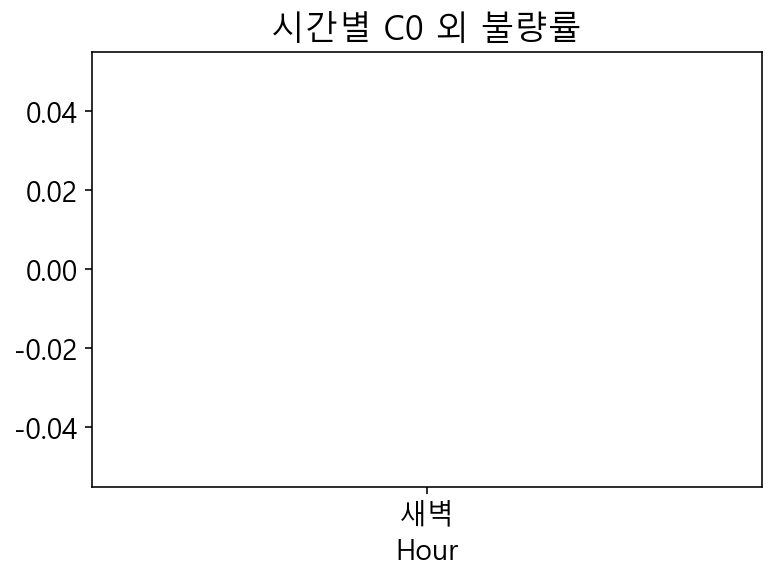

In [21]:
fig = plt.subplot()

sns.lineplot(data = c0_diif_scale, x = 'Hour', y = 'bad_percent')
fig.set_title("시간별 C0 외 불량률")

In [22]:
spec_size_total = df.groupby('SPEC_SIZE').agg(count = ('SCALE', 'count'))

sepc_size_scale = df.groupby('SPEC_SIZE').agg(count = ('SCALE', 'sum'))
sepc_size_scale['total'] = spec_size_total['count']
sepc_size_scale["불량률"] = 100 - (sepc_size_scale['count'] / spec_size_total['count'] * 100)
finish_spec_size = sepc_size_scale[sepc_size_scale['count'] >= 20].reset_index()
finish_spec_size

,SPEC_SIZE,count,total,불량률
0,BV,72,86,16.279070
1,COMMON,26,28,7.142857
2,GL,49,56,12.500000
3,JS,60,146,58.904110
4,LR,77,105,26.666667
5,NV,78,105,25.714286
6,PILAC,38,40,5.000000


Text(0.5, 1.0, 'SPEC에 따른 불량률(수량 20개 이상 제품 중)')

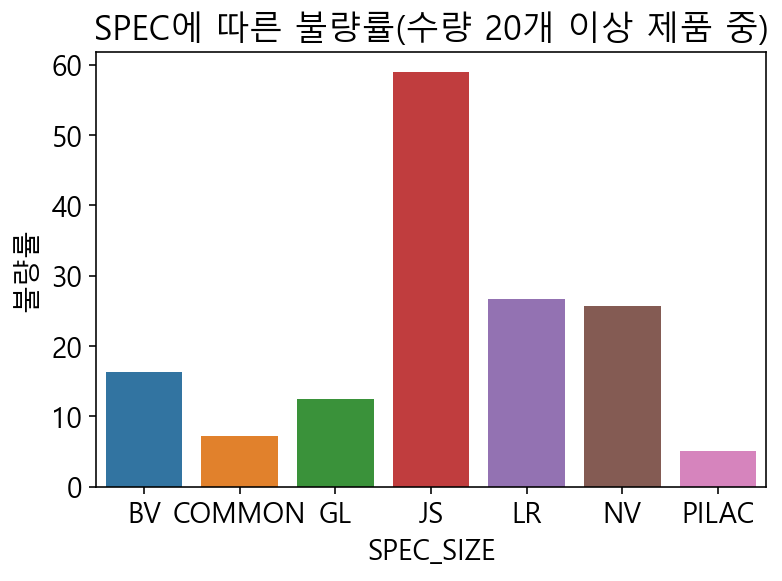

In [23]:
fig = plt.subplot()

sns.barplot(data = finish_spec_size, x = 'SPEC_SIZE', y = '불량률')
fig.set_title("SPEC에 따른 불량률(수량 20개 이상 제품 중)")

In [24]:
scale_rolling = c0_data.groupby(['ROLLING_DESCALING', 'SPEC_SIZE']).agg(count = ('SCALE', 'sum'))
total = c0_data.groupby(['ROLLING_DESCALING', 'SPEC_SIZE']).agg(total = ('SCALE', 'count'))

scale_rolling['total'] = total['total']
scale_rolling['불량률'] = 100 - (scale_rolling['count'] / total['total'] * 100)
rolling_size =  scale_rolling[scale_rolling['total'] > 10].reset_index()
rolling_size

,ROLLING_DESCALING,SPEC_SIZE,count,total,불량률
0,6,JS,0,15,100.000000
1,8,BV,13,13,0.000000
2,8,JS,13,56,76.785714
3,8,KR,7,20,65.000000
4,8,KS,3,14,78.571429
5,8,LR,14,21,33.333333
6,8,NV,7,15,53.333333
7,8,SA283,7,15,53.333333
8,10,BV,19,27,29.629630
9,10,GL,9,11,18.181818


<AxesSubplot:xlabel='SPEC_SIZE', ylabel='불량률'>

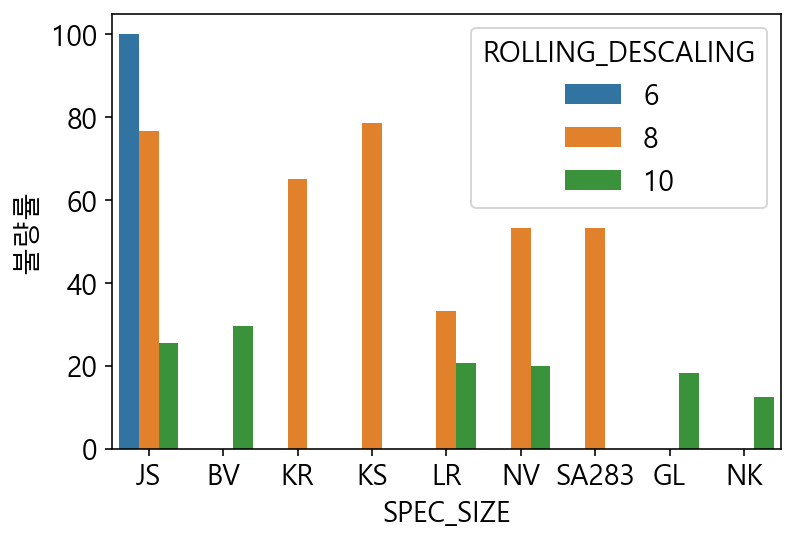

In [25]:
sns.barplot(data = rolling_size, x = 'SPEC_SIZE', y = '불량률' ,hue = 'ROLLING_DESCALING')

## PT 길이, 폭, 두께, 무게에 따른 불량값

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale_PT = df.groupby('SCALE').agg(
    THK_MEAN = ('PT_THK', 'mean'),
    WDTH_MEAN = ('PT_WDTH', 'mean'),
    LTH_MEAN = ('PT_LTH', 'mean'),
    WGT_MEAN = ('PT_WGT', 'mean')
                       ).reset_index()

scale_PT

X = pd.DataFrame(data = scale_PT.drop(['SCALE'], axis = 1))
Y = pd.DataFrame(data = scale_PT['SCALE'])

scaler_X = scaler.fit_transform(X)

scaler_X

array([[-1., -1.,  1.,  1.],
       [ 1.,  1., -1., -1.]])

## 작업횟수에 따른 불량률

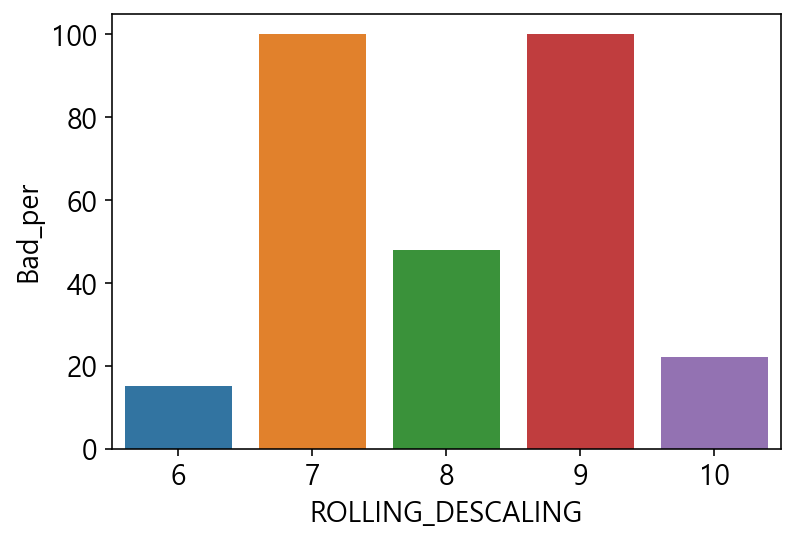

In [27]:
# SCALE별 슬레이싱
SC_1 = df[df.copy().loc[:,'SCALE'] == 1] # 양품
SC_0 = df[df.copy().loc[:,'SCALE'] == 0] # 불량

# SCLAE, ROLLING_DESCALING gruoby
SC_1_RD = SC_1.groupby(['ROLLING_DESCALING'], as_index = False).agg(Good_count = ('SCALE', 'sum')) # 양품
SC_0_RD = SC_0.groupby(['ROLLING_DESCALING'], as_index = False).agg(Bad_count = ('SCALE', 'count')) # 불량

# 양품/불량 총 합 및 불량률
SC_RD = SC_0_RD.merge(SC_1_RD, on = 'ROLLING_DESCALING', how = 'outer')
SC_RD = SC_RD.fillna(0)
SC_RD['Total_count'] = SC_RD['Good_count'] + SC_RD['Bad_count'] # Total_count 계산
SC_RD['Bad_per'] = round(SC_RD['Bad_count'] / SC_RD['Total_count'] * 100, 0) # Bad_per 계산
SC_RD = SC_RD.drop(index = 0) # 'ROLLING_DESCALING' 5는 무의미한 이상치값이라 예상하여 삭제
SC_RD

# ROLLING_DESCALING별 불량 생산 시각화
graph_SC_0_RD = sns.barplot(data = SC_RD, x = 'ROLLING_DESCALING', y = 'Bad_per')

# 양품 수도 시각화.
# 불량률 양품률 만들기.

## 온도 시간별 불량품
##### 변수
- data_temp_time : 양품별로 온도 시간 평균값 그룹바이
- data_t_mean     : 양품별 스펙별 온도 시간 평균값 그룹바이
- data_t_mean2    : 양품별 스펙별 온도 시간 평균값 그룹바이  10개 이상
- data_temp       :  양품별 스펙별 온도만
- data_time        :  양품별 스펙별 시간만

Text(0.5, 1.0, 'FUR_TIME')

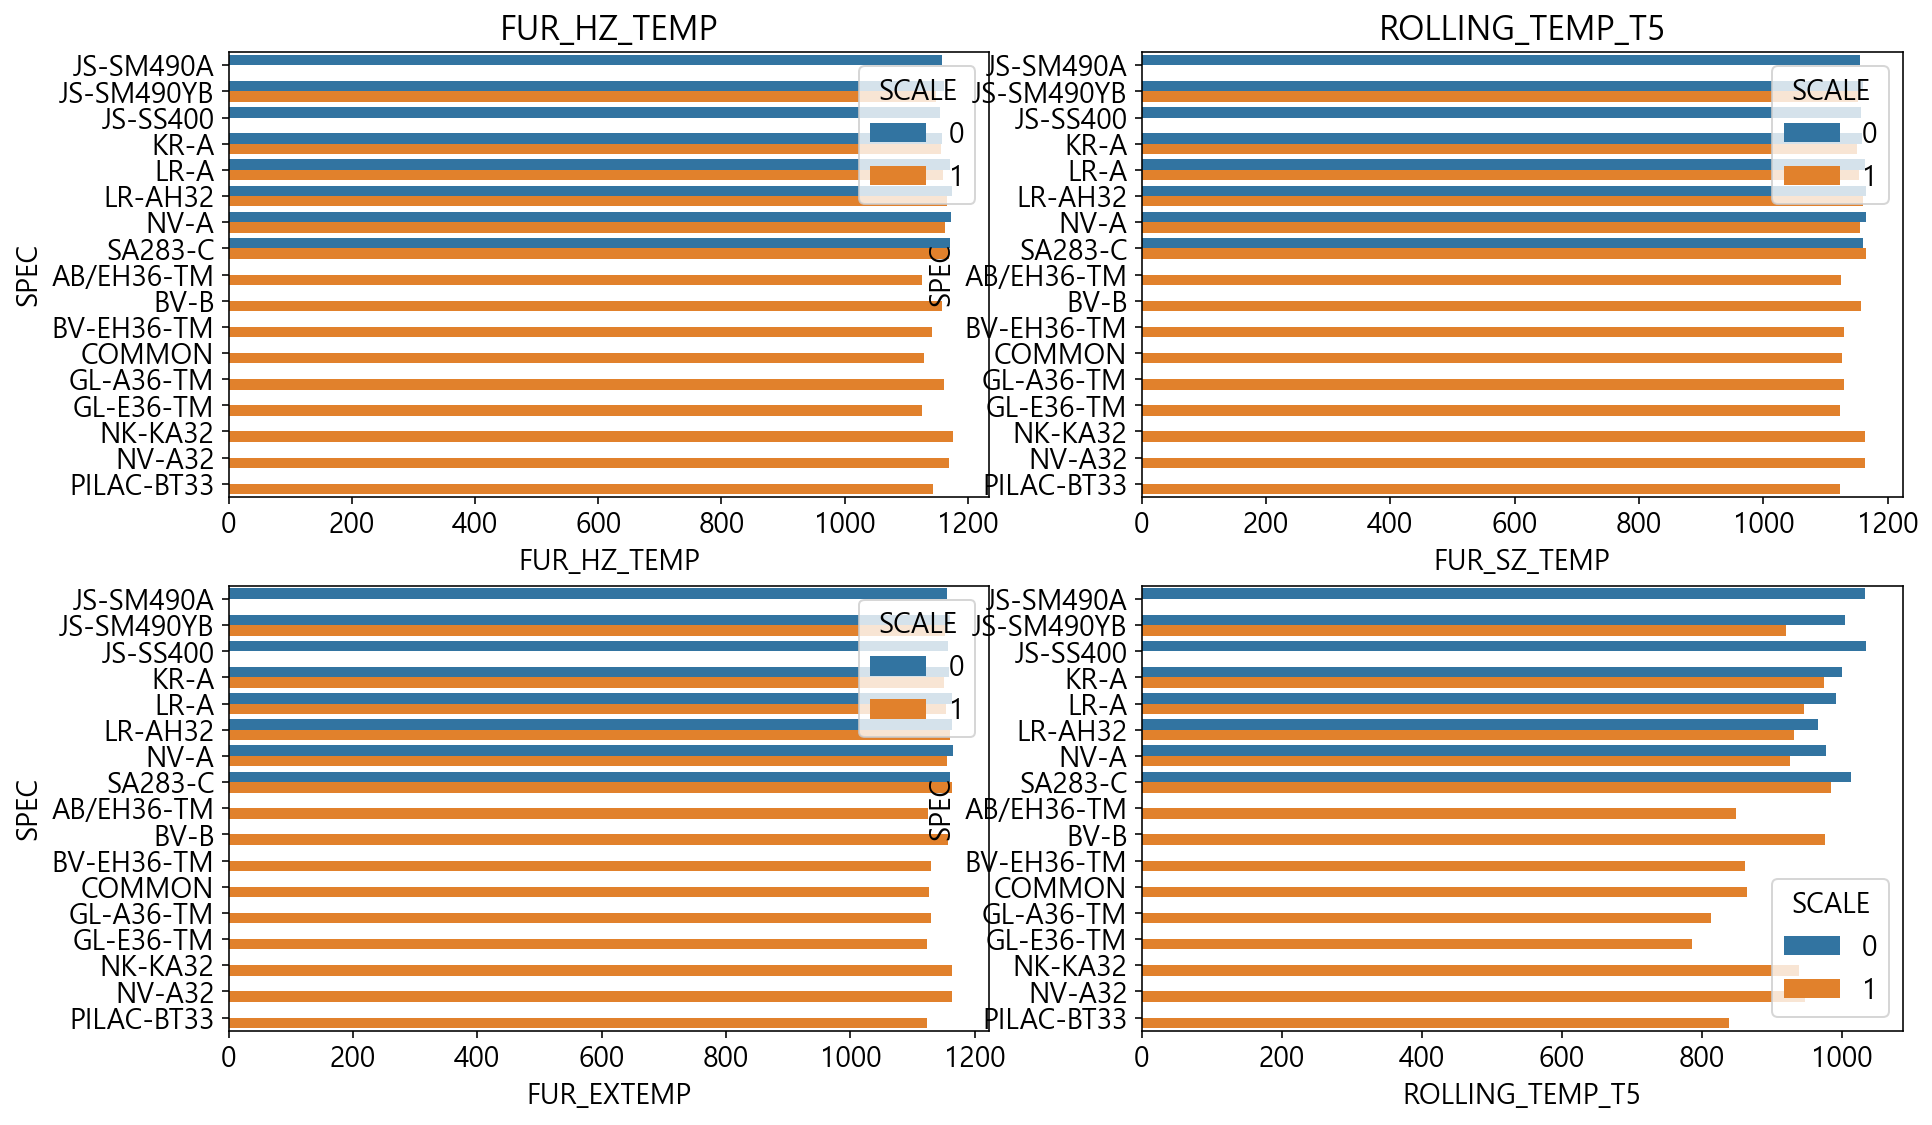

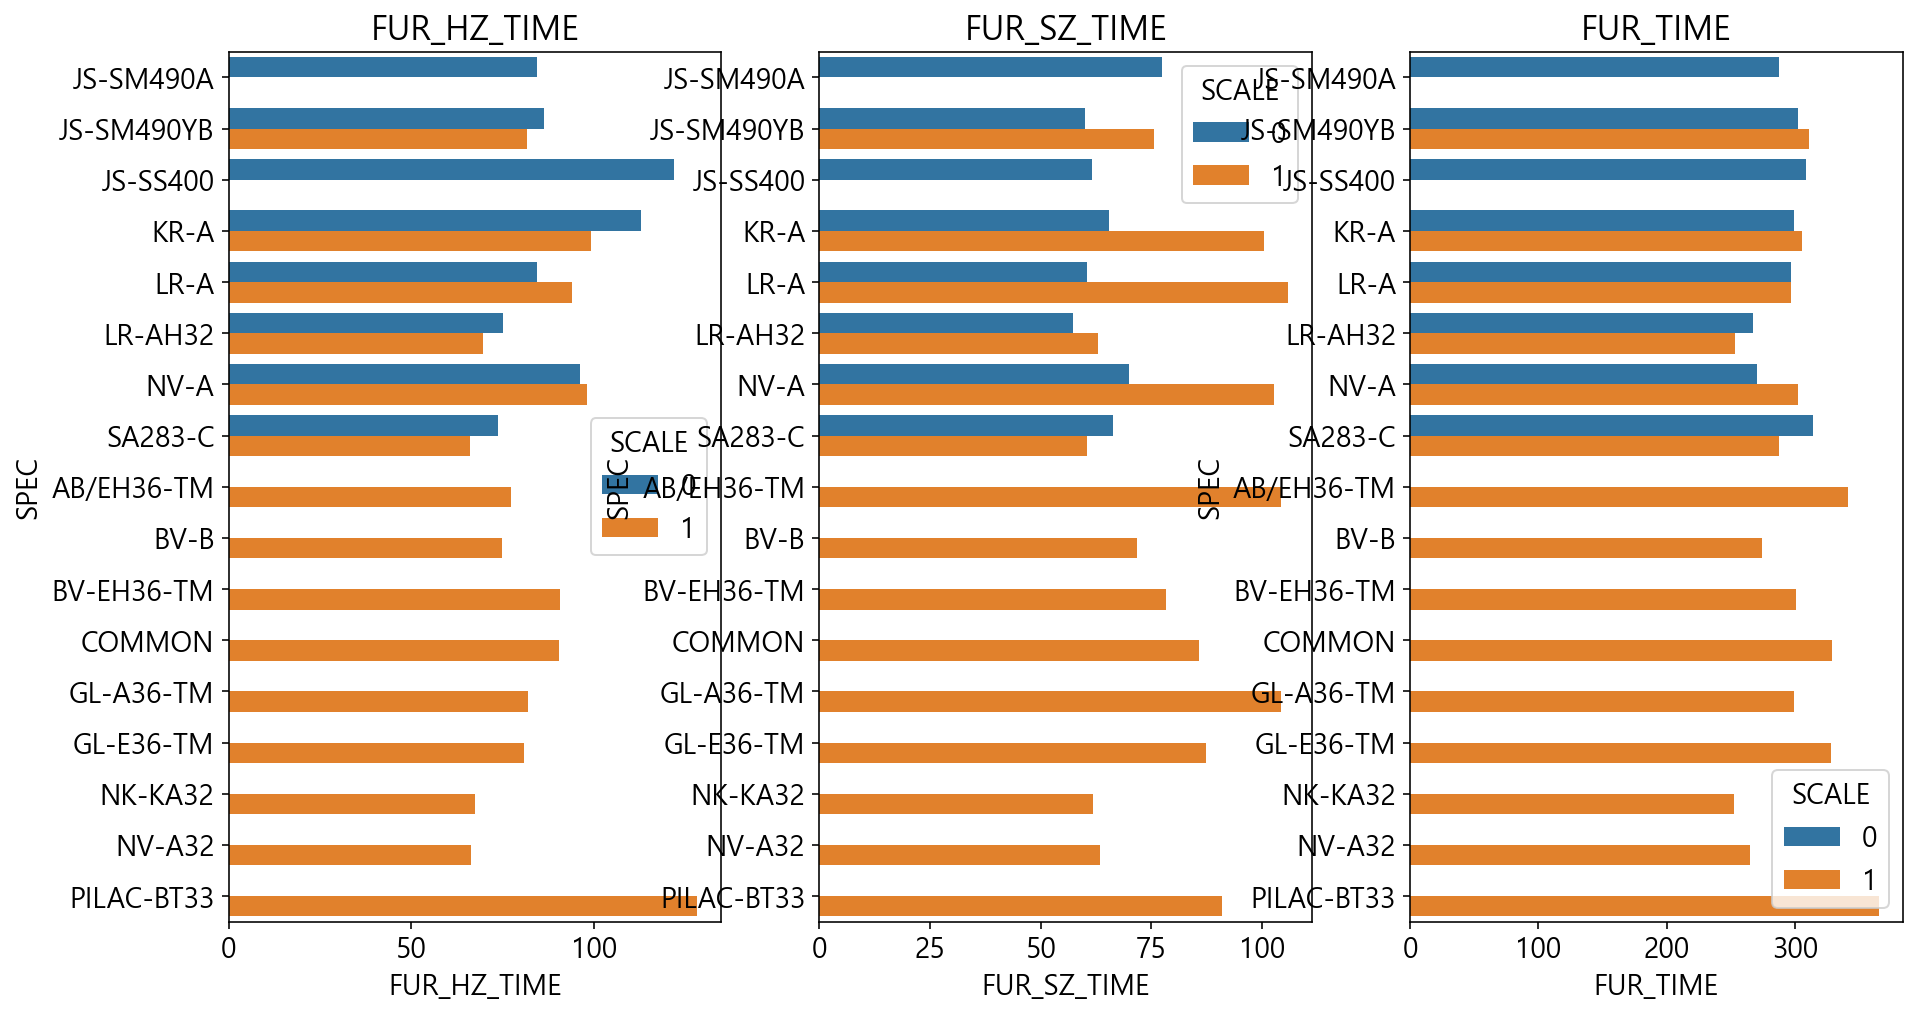

In [28]:
data_temp_time = df.groupby(['SCALE'], as_index=False).agg({'FUR_HZ_TEMP' : 'mean',
                                                                           'FUR_HZ_TIME' : 'mean',
                                                                           'FUR_SZ_TEMP' : 'mean',
                                                                           'FUR_SZ_TIME' : 'mean',
                                                                           'FUR_TIME' : 'mean',
                                                                           'FUR_EXTEMP' : 'mean',
                                                                           'ROLLING_TEMP_T5' : 'mean',
                                                                           })
data_temp_time

# 양품별 온도 시간 평균값 도출
# 양품과 불량 간에 편차가 존재 한다.
data_t_mean = df.groupby(['SCALE','SPEC'], as_index=False)[['FUR_HZ_TEMP']].count()
data3 = df.groupby(['SCALE','SPEC'], as_index=False)[['FUR_HZ_TEMP']].mean()
data4 = df.groupby(['SCALE','SPEC'], as_index=False)[['FUR_HZ_TIME']].mean()
data5 = df.groupby(['SCALE','SPEC'], as_index=False)[['FUR_SZ_TEMP']].mean()
data6 = df.groupby(['SCALE','SPEC'], as_index=False)[['FUR_SZ_TIME']].mean()
data7 = df.groupby(['SCALE','SPEC'], as_index=False)[['FUR_TIME']].mean()
data8 = df.groupby(['SCALE','SPEC'], as_index=False)[['FUR_EXTEMP']].mean()
data9 = df.groupby(['SCALE','SPEC'], as_index=False)[['ROLLING_TEMP_T5']].mean()

data_t_mean['FUR_HZ_TEMP2'] = data3['FUR_HZ_TEMP']
data_t_mean['FUR_HZ_TIME'] = data4['FUR_HZ_TIME']
data_t_mean['FUR_SZ_TEMP'] = data5['FUR_SZ_TEMP']
data_t_mean['FUR_SZ_TIME'] = data6['FUR_SZ_TIME']
data_t_mean['FUR_TIME'] = data7['FUR_TIME']
data_t_mean['FUR_EXTEMP'] = data8['FUR_EXTEMP']
data_t_mean['ROLLING_TEMP_T5'] = data9['ROLLING_TEMP_T5']
data_t_mean = data_t_mean.rename(columns = {'FUR_HZ_TEMP':'count'})
data_t_mean2 = data_t_mean[data_t_mean['count'] >= 10]


# 양품 별로 스팩별로 온도 타임 평균값 적은 개수로는 판단하기 모호하므로 10개 이상 조건
data_t_mean2 = data_t_mean2.rename(columns = {'FUR_HZ_TEMP2':'FUR_HZ_TEMP'})
data_temp = data_t_mean2.drop(['count','FUR_HZ_TIME','FUR_SZ_TIME','FUR_TIME'], axis=1)
data_time = data_t_mean2.drop(['count','FUR_HZ_TEMP','FUR_SZ_TEMP','FUR_EXTEMP','ROLLING_TEMP_T5'], axis=1)
# 양품별 스펙별 온도 차트
# 양품과 차이가 적지만 있다


fig, ax = plt.subplots(2, 2,  figsize=(15, 9))
sns.barplot(data = data_temp, x = 'FUR_HZ_TEMP', y = 'SPEC',hue = 'SCALE', ax = ax[0][0])
ax[0][0].set_title("FUR_HZ_TEMP")
sns.barplot(data = data_temp, x = 'FUR_SZ_TEMP', y = 'SPEC',hue = 'SCALE', ax = ax[0][1])
ax[0][1].set_title("FUR_SZ_TEMP")
sns.barplot(data = data_temp, x = 'FUR_EXTEMP', y = 'SPEC',hue = 'SCALE', ax = ax[1][0])
ax[0][1].set_title("FUR_EXTEMP")
sns.barplot(data = data_temp, x = 'ROLLING_TEMP_T5', y = 'SPEC',hue = 'SCALE', ax = ax[1][1])
ax[0][1].set_title("ROLLING_TEMP_T5")


# 양품별 스펙별 시간 차트
# 양품과 차이가 적지만 있다
fig, ax = plt.subplots(1, 3,  figsize=(15, 8))
sns.barplot(data = data_time, x = 'FUR_HZ_TIME', y = 'SPEC',hue = 'SCALE', ax = ax[0])
ax[0].set_title("FUR_HZ_TIME")
sns.barplot(data = data_time, x = 'FUR_SZ_TIME', y = 'SPEC',hue = 'SCALE', ax = ax[1])
ax[1].set_title("FUR_SZ_TIME")
sns.barplot(data = data_time, x = 'FUR_TIME', y = 'SPEC',hue = 'SCALE', ax = ax[2])
ax[2].set_title("FUR_TIME")

##### 결론 : 양품에 맞는 온도와 시간으로 조절 진행하면 불량율을 줄일수 있다, 규격별로 불량률이 아예 없는 것도 존재하기 떄문에, 이 부분을 중점적으로 보면 될 것 같다.

## 그룹별 시각화

In [29]:
# pivot2 = pd.pivot_table(df, values='ROLLING_DATE', index='WORK_GR', columns='SCALE', aggfunc='count')
# pivot2 = pivot2.fillna(0)
# pivot2['total'] = pivot2[1] + pivot2[0] # 1 = 양품, 0 = 불량
# pivot2

# colors = ['#F47E7A', '#B71F5C']
# graph = pivot2.plot.barh(align='center', stacked=True, figsize=(10,6), color=colors)
# plt.show()

In [30]:
work_gruop = df.groupby(['WORK_GR' ]).agg(work_hour = ('ROLLING_DATE', 'count'))
work_gruop

,work_hour
WORK_GR,
1조,189
2조,165
3조,172
4조,194


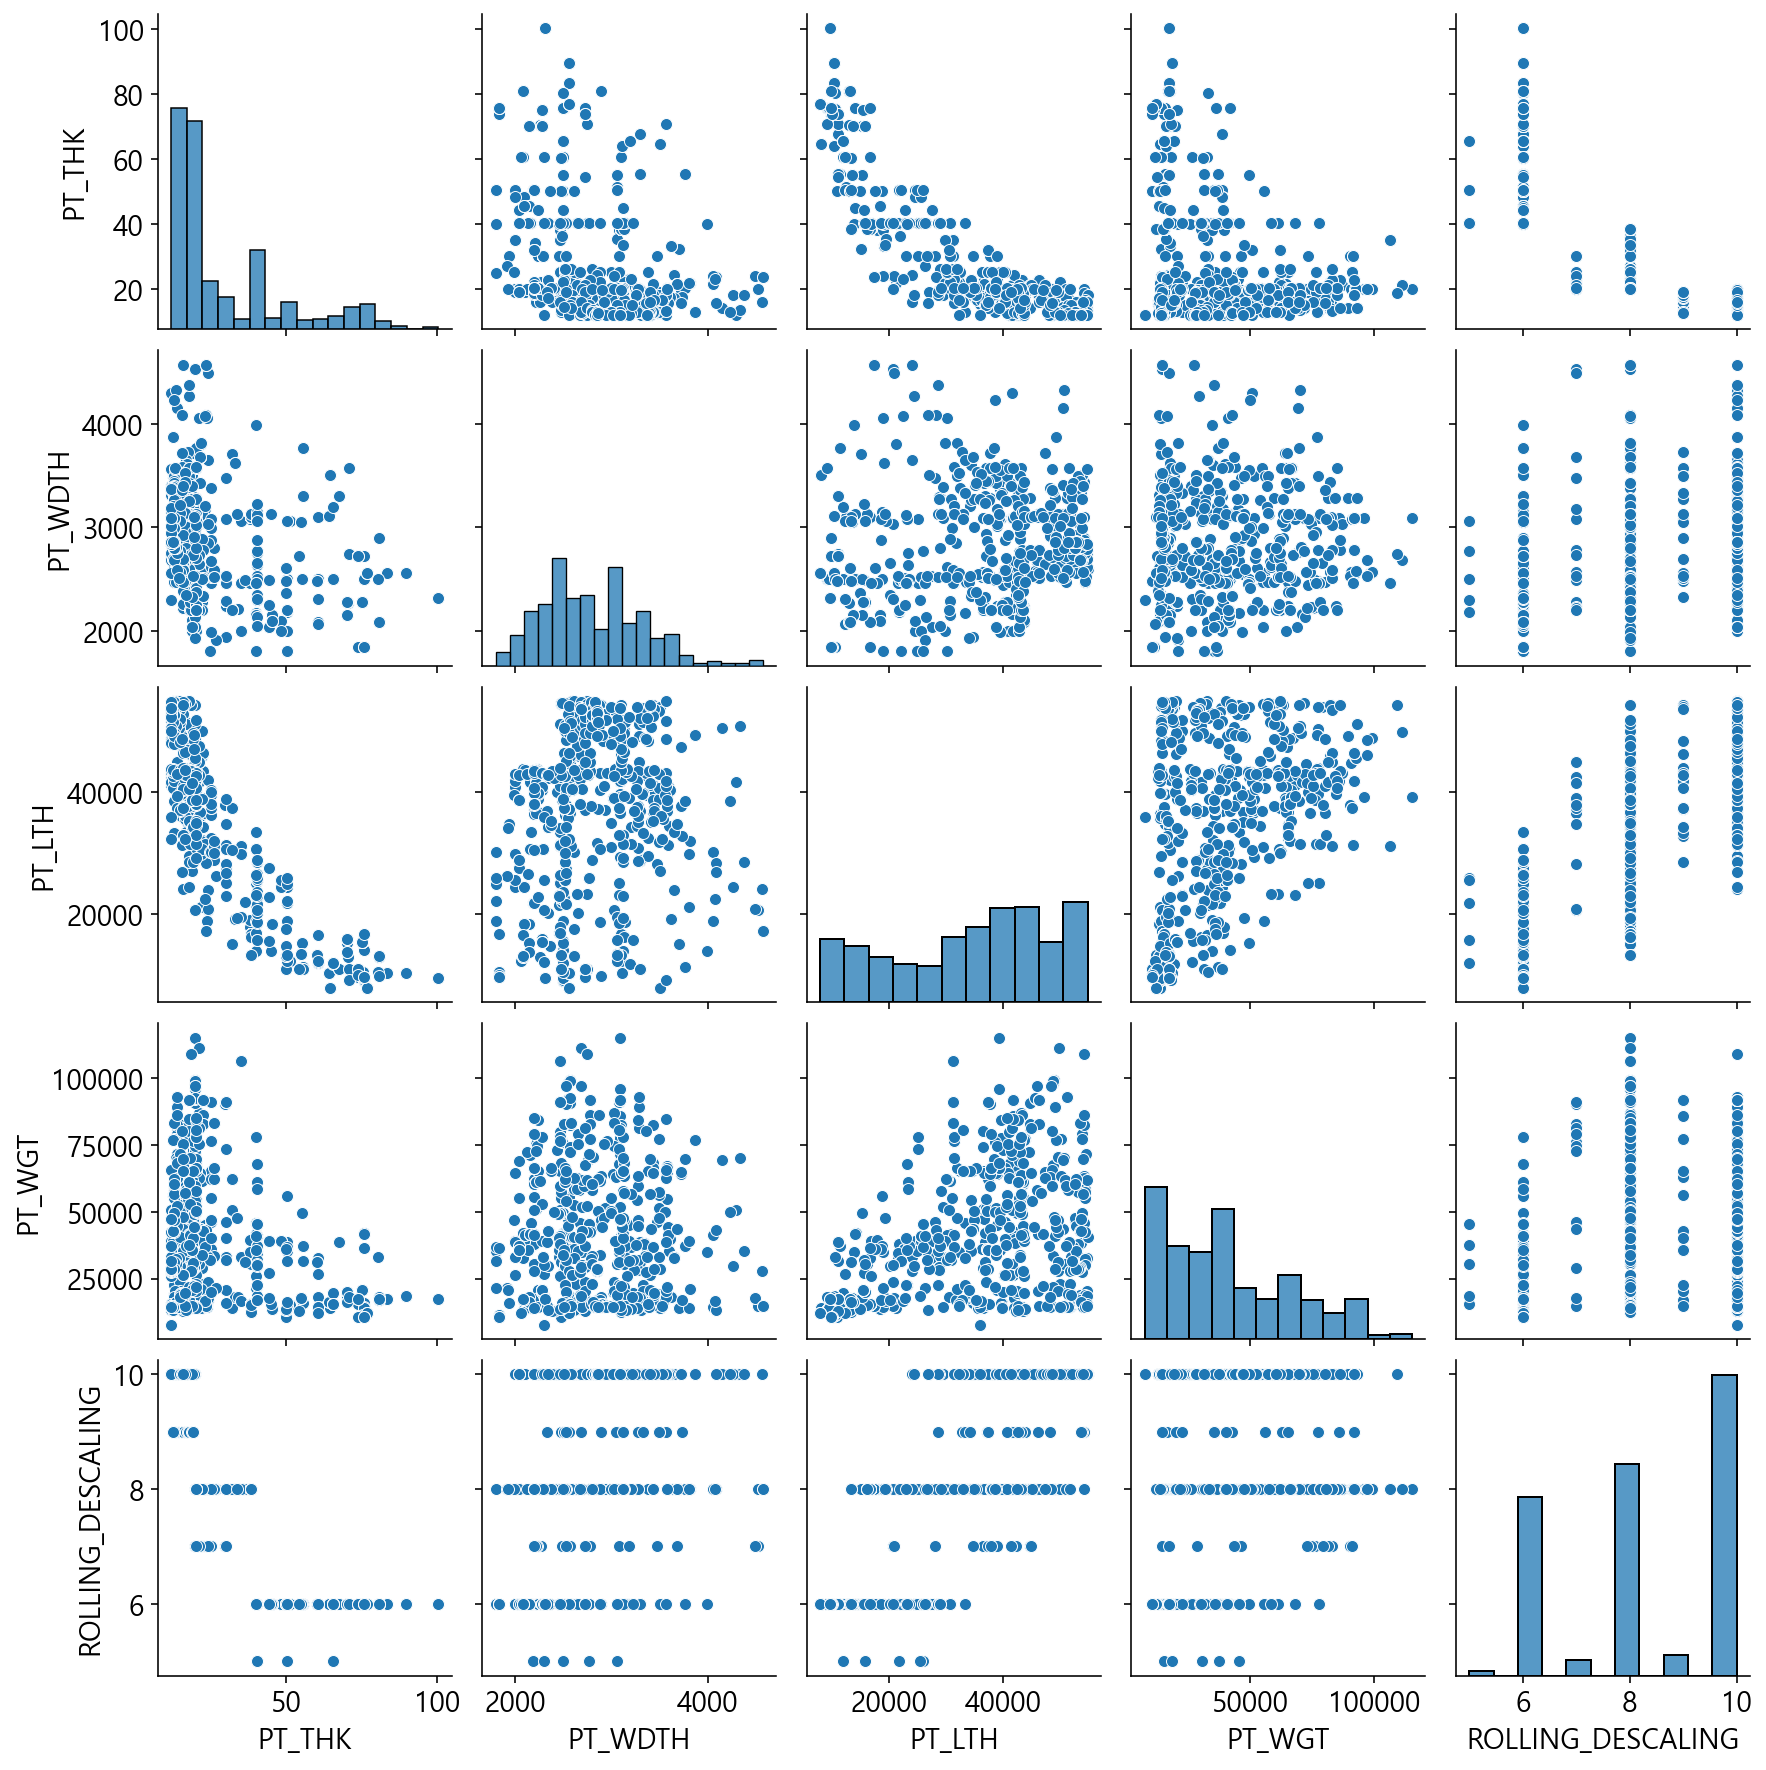

In [31]:
pt_df = df[['PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT', 'ROLLING_DESCALING']]

sns.pairplot(pt_df)

In [32]:
# pivot1 = pd.pivot_table(df, values='ROLLING_DATE', index='SPEC_SIZE', columns='SCALE', aggfunc='count')
# pivot1 = pivot1.fillna(0)
# pivot1['total'] = pivot1[0] + pivot1[1]
# pivot1['불량률'] = pivot1[0]/pivot1['total']
# pivot1_1 = pivot1['불량률']
# pivot1_1
# sns.set(style="darkgrid")
# sns.set_color_codes("muted")
# 불량률이 50%를 초과하면 붉은색으로 알림
# colors = ['red' if (x > 0.3) else 'green' for x in pivot1_1]
# Create barplot
# graph = pivot1_1.plot.barh(align='center', stacked=True, figsize=(5,30), color=colors)

# pivot1

In [33]:
# 새벽 : 0
# 오전 : 1
# 오후 : 2
# 저녁 : 3

def change_hour(hour):
    if hour == "새벽":
        return 0
    elif hour == "오전":
        return 1
    elif hour == "오후":
        return 2
    else:
        return 3
    

df["Hour"] = df['Hour'].apply(change_hour)

# 모델링 하기

In [34]:
# C0와 C0 제외 DataFrame 만들기
c0 = pd.DataFrame(df[df['STEEL_KIND'] == 'C0'])
c0_except = pd.DataFrame(df[df['STEEL_KIND'] != 'C0'])

# C0 X, Y 값을 나누기
c0_X = pd.DataFrame(df[df['STEEL_KIND'] == 'C0'].drop(['SCALE', 'ROLLING_DATE', 'SPEC', 'STEEL_KIND', 'FUR_NO', 'WORK_GR', 'Year', 'SPEC_SIZE'], axis= 1))
c0_Y = pd.DataFrame(c0['SCALE'])

# C0 제외 한 X, Y 값을 나누기
c0_except_X = pd.DataFrame(c0_except.drop(['SCALE', 'ROLLING_DATE', 'SPEC', 'STEEL_KIND', 'FUR_NO', 'WORK_GR', 'Year', 'SPEC_SIZE'], axis= 1))
c0_except_Y = pd.DataFrame(c0_except['SCALE'])

# total의 X,Y 값을 나누기
X = pd.DataFrame(df.drop(['SCALE', 'ROLLING_DATE', 'SPEC', 'STEEL_KIND', 'FUR_NO', 'WORK_GR', 'Year', 'SPEC_SIZE'], axis= 1))
Y = pd.DataFrame(df['SCALE'])

c0_X

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,Hour
90,20.13,3575,39279,66570,1,1129,76,1126,118,336,1126,934,1,8,0
91,20.13,3575,39545,67020,2,1140,68,1132,104,348,1132,911,1,8,0
92,17.10,3370,39613,35840,2,1130,71,1130,112,348,1130,935,1,10,0
93,14.09,3284,51234,93050,1,1140,80,1131,117,352,1131,915,1,10,0
94,14.09,3284,51234,93050,2,1142,74,1132,123,353,1132,923,1,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,20.14,3580,38639,21870,1,1172,72,1164,62,245,1164,1005,1,8,2
716,15.08,3212,48233,18340,1,1150,61,1169,61,238,1169,947,1,10,2
717,16.60,3441,43688,19590,2,1169,65,1163,77,247,1163,948,1,10,2
718,15.59,3363,48740,80240,2,1179,86,1163,45,243,1163,940,1,10,2


## GaussianNB 알고리즘

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# C0 - GaussianNB() 모델링 정확도 분석

X_train, X_test, Y_train, Y_test = train_test_split(c0_X, c0_Y, test_size=0.3, random_state=5)

scaler = StandardScaler()

scaler.fit(X_train)

c0_train_scaler = scaler.transform(X_train)
c0_test_scaler = scaler.transform(X_test)

gnb = GaussianNB(priors=[10/100, 90/100])
gnb.fit(X_train, Y_train['SCALE'].ravel())

y_pred = gnb.predict(X_train)
gnb_train_score = gnb.score(X_train, Y_train)
gnb_test_scroe = gnb.score(X_test, Y_test)

print(f'Gassia Navie Bayes의 훈련 정확도는 {round(gnb_train_score, 2) * 100}%입니다.')
print(f'Gassia Navie Bayes의 테스트 정확도는 {round(gnb_test_scroe, 2) * 100}%입니다.')

Gassia Navie Bayes의 훈련 정확도는 82.0%입니다.
Gassia Navie Bayes의 테스트 정확도는 79.0%입니다.


In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_train, y_pred)

array([[ 98,  51],
       [ 14, 189]], dtype=int64)

In [37]:
# C0 제외 - GaussianNB() 모델링 정확도 분석

X_train, X_test, Y_train, Y_test = train_test_split(c0_except_X, c0_except_Y, test_size=0.3, random_state=5)

gnb_except = GaussianNB(priors=[10/100, 90/100])
gnb_except.fit(X_train, Y_train)

Y_pred = gnb_except.predict(X_test)
gnb_train_except_score = gnb.score(X_train, Y_train)
gnb_test_except_scroe = gnb.score(X_test, Y_test)

print(f'Gassia Navie Bayes의 훈련 정확도는 {round(gnb_train_except_score, 2) * 100}%입니다.')
print(f'Gassia Navie Bayes의 테스트 정확도는 {round(gnb_test_except_scroe, 2) * 100}%입니다.')

## underfitting????

Gassia Navie Bayes의 훈련 정확도는 39.0%입니다.
Gassia Navie Bayes의 테스트 정확도는 27.0%입니다.


C:\Users\Song\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, Y_pred)

array([[ 1,  2],
       [ 7, 56]], dtype=int64)

In [39]:
# Total - GaussianNB() 모델링 정확도 분석

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

gnb_except = GaussianNB(priors=[0.5, 0.5])
gnb_total = GaussianNB()
gnb_total.fit(X_train_scaler, Y_train['SCALE'].ravel())

Y_pred = gnb_total.predict(X_test_scaler)
gnb_train_total_score = gnb.score(X_train_scaler, Y_train)
gnb_test_total_scroe = gnb.score(X_test_scaler, Y_test)

print(f'Gassia Navie Bayes의 훈련 정확도는 {round(gnb_train_total_score, 2) * 100}%입니다.')
print(f'Gassia Navie Bayes의 테스트 정확도는 {round(gnb_test_total_scroe, 2) * 100}%입니다.')

Gassia Navie Bayes의 훈련 정확도는 68.0%입니다.
Gassia Navie Bayes의 테스트 정확도는 67.0%입니다.


C:\Users\Song\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Song\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, Y_pred)

array([[ 10,  61],
       [  0, 145]], dtype=int64)

##  Random Forest Classifier

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Total의 RandomForest
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 5)
# MinMaxScaler로 스케일링
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_MinMax = scaler.transform(X_train)
X_test_MinMax = scaler.transform(X_test)
# RandomForest 설정
rf = RandomForestClassifier(max_depth = 4,
                                n_estimators=200)
rf.fit(X_train_MinMax, Y_train['SCALE'].ravel())
# 예측값
pred_rf = rf.predict(X_test_MinMax)
#정확도 계산
rf_train_score = rf.score(X_train_MinMax, Y_train['SCALE'].ravel())
rf_test_score = rf.score(X_test_MinMax, Y_test['SCALE'].ravel())
print(f'랜덤포레스트 훈련 정확도는 {int(round(rf_train_score,2)*100)}% 입니다.')
print(f'랜덤포레스트 테스트 정확도는 {int(round(rf_test_score,2)*100)}% 입니다.')

랜덤포레스트 훈련 정확도는 95% 입니다.
랜덤포레스트 테스트 정확도는 94% 입니다.


In [42]:
# C0의 RandomForest
X_train, X_test, Y_train, Y_test = train_test_split(c0_X,c0_Y, test_size = 0.3, random_state = 5)
# MinMaxScaler로 스케일링
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_MinMax = scaler.transform(X_train)
X_test_MinMax = scaler.transform(X_test)
# RandomForest 설정
c0_rf = RandomForestClassifier(max_depth = 5,
                                n_estimators=200)
c0_rf.fit(X_train_MinMax, Y_train['SCALE'].ravel())
# 예측값
pred_c0_rf = c0_rf.predict(X_test_MinMax)
#정확도 계산
c0_rf_train_score = c0_rf.score(X_train_MinMax, Y_train['SCALE'].ravel())
c0_rf_test_score = c0_rf.score(X_test_MinMax, Y_test['SCALE'].ravel())
print(f'랜덤포레스트 훈련 정확도는 {int(round(c0_rf_train_score,2)*100)}% 입니다.')
print(f'랜덤포레스트 테스트 정확도는 {int(round(c0_rf_test_score,2)*100)}% 입니다.')

랜덤포레스트 훈련 정확도는 97% 입니다.
랜덤포레스트 테스트 정확도는 95% 입니다.


In [43]:
# C0 제외한 나머지의 RandomForest
X_train, X_test, Y_train, Y_test = train_test_split(c0_except_X,c0_except_Y, test_size = 0.3, random_state = 5)
# MinMaxScaler로 스케일링
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_MinMax = scaler.transform(X_train)
X_test_MinMax = scaler.transform(X_test)
# RandomForest 설정
c0_except_rf = RandomForestClassifier(max_depth = 3,
                                n_estimators=200)
c0_except_rf.fit(X_train_MinMax, Y_train['SCALE'].ravel())
# 예측값
pred_rf = c0_except_rf.predict(X_test_MinMax)
#정확도 계산
c0_except_rf_train_score = c0_except_rf.score(X_train_MinMax, Y_train['SCALE'].ravel())
c0_except_rf_test_score = c0_except_rf.score(X_test_MinMax, Y_test['SCALE'].ravel())
print(f'랜덤포레스트 훈련 정확도는 {int(round(c0_except_rf_train_score,2)*100)}% 입니다.')
print(f'랜덤포레스트 테스트 정확도는 {int(round(c0_except_rf_test_score,2)*100)}% 입니다.')


랜덤포레스트 훈련 정확도는 96% 입니다.
랜덤포레스트 테스트 정확도는 95% 입니다.


## SVM Classifier

In [44]:
# Total의 SVM
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 5)
 # StandardScaler로 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
# SVM 설정
T_svc_model = SVC(kernel = 'rbf', C = 5, gamma = 0.1)
T_svc_model.fit(X_train_std, Y_train)
# 예측값
pred_SVC = T_svc_model.predict(X_test_std)
#정확도 계산
T_svc_train_score = T_svc_model.score(X_train_std, Y_train['SCALE'].ravel())
T_svc_test_score = T_svc_model.score(X_test_std, Y_test['SCALE'].ravel())
print(f'SVM 훈련 정확도는 {int(round(T_svc_train_score,2)*100)}% 입니다.')
print(f'SVM 테스트 정확도는 {int(round(T_svc_test_score,2)*100)}% 입니다.')

SVM 훈련 정확도는 95% 입니다.
SVM 테스트 정확도는 90% 입니다.


C:\Users\Song\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
# C0의 svm
X_train, X_test, Y_train, Y_test = train_test_split(c0_X,c0_Y, test_size = 0.3, random_state = 5)

# StandardScaler로 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# SVM 설정
c0_svc_model = SVC(kernel = 'rbf', C = 3, gamma = 0.1)
c0_svc_model.fit(X_train_std, Y_train)

# 예측값
pred_SVC = c0_svc_model.predict(X_test_std)

#정확도 계산
c0_svc_train_score = c0_svc_model.score(X_train_std, Y_train['SCALE'].ravel())
c0_svc_test_score = c0_svc_model.score(X_test_std, Y_test['SCALE'].ravel())
print(f'SVM 훈련 정확도는 {int(round(c0_svc_train_score,2)*100)}% 입니다.')
print(f'SVM 테스트 정확도는 {int(round(c0_svc_test_score,2)*100)}% 입니다.')

SVM 훈련 정확도는 95% 입니다.
SVM 테스트 정확도는 86% 입니다.


C:\Users\Song\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
# C0의 제외한 나머지의 SVM
X_train, X_test, Y_train, Y_test = train_test_split(c0_except_X,c0_except_Y, test_size = 0.3, random_state = 5)

# StandardScaler로 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# SVM 설정
c0_except_svc_model = SVC(kernel = 'rbf', C = 2, gamma = 0.1)
c0_except_svc_model.fit(X_train_std, Y_train)

# 예측값
pred_SVC = c0_except_svc_model.predict(X_test_std)

#정확도 계산
c0_except_svc_train_score = c0_except_svc_model.score(X_train_std, Y_train['SCALE'].ravel())
c0_except_svc_test_score = c0_except_svc_model.score(X_test_std, Y_test['SCALE'].ravel())
print(f'SVM 훈련 정확도는 {int(round(c0_except_svc_train_score,2)*100)}% 입니다.')
print(f'SVM 테스트 정확도는 {int(round(c0_except_svc_test_score,2)*100)}% 입니다.')

SVM 훈련 정확도는 97% 입니다.
SVM 테스트 정확도는 97% 입니다.


C:\Users\Song\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(c0_X,c0_Y, test_size = 0.3, random_state = 5)
 # StandardScaler로 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
# 모뎅  피팅
model = LogisticRegression()
model.fit(X_train_std, Y_train)
# 예측
pred_c0_rf = model.predict(X_test_std)


X_train, X_test, Y_train, Y_test = train_test_split(c0_except_X,c0_except_Y, test_size = 0.3, random_state = 5)
# StandardScaler로 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
# 모뎅  피팅
model = LogisticRegression()
model.fit(X_train_std, Y_train)
pred_c0_rf = model.predict(X_test_std)
# 맞추는 포인트

# 영향을 주는 요소

c0_rl_train_score = model.score(X_train_std, Y_train['SCALE'].ravel())
c0_rl_test_score = model.score(X_test_std, Y_test['SCALE'].ravel())
print(f'로지스틱 훈련 정확도는 {int(round(c0_rl_train_score,2)*100)}% 입니다.')
print(f'로지스틱 테스트 정확도는 {int(round(c0_rl_test_score,2)*100)}% 입니다.')



로지스틱 훈련 정확도는 97% 입니다.
로지스틱 테스트 정확도는 95% 입니다.


C:\Users\Song\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Song\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 5)
 # StandardScaler로 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
# 모뎅  피팅
model = LogisticRegression()
model.fit(X_train_std, Y_train)
# 맞추는 포인트
pred_c0_rf = model.predict(X_test_std)

c0_rf_train_score = model.score(X_train_std, Y_train['SCALE'].ravel())
c0_rf_test_score = model.score(X_test_std, Y_test['SCALE'].ravel())
print(f'로지스틱 훈련 정확도는 {int(round(c0_rf_train_score,2)*100)}% 입니다.')
print(f'로지스틱 테스트 정확도는 {int(round(c0_rf_test_score,2)*100)}% 입니다.')


로지스틱 훈련 정확도는 88% 입니다.
로지스틱 테스트 정확도는 87% 입니다.


C:\Users\Song\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## XG Boost

In [67]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
# Total에 대한 분류 모델
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 5)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Total 대한 XGClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train_std, Y_train)

pred_total_xg = xgbc.predict(X_test_std)

xgbc_total_train_score = xgbc.score(X_train_std, Y_train)
xgbc_total_test_score = xgbc.score(X_test_std, Y_test)

print(f'XGBoost 훈련 정확도는 {int(round(xgbc_total_train_score,2)*100)}% 입니다.')
print(f'XGBOost 테스트 정확도는 {int(round(xgbc_total_test_score,2)*100)}% 입니다.')

XGBoost 훈련 정확도는 100% 입니다.
XGBOost 테스트 정확도는 100% 입니다.


<AxesSubplot:xlabel='cofficient', ylabel='feature_names'>

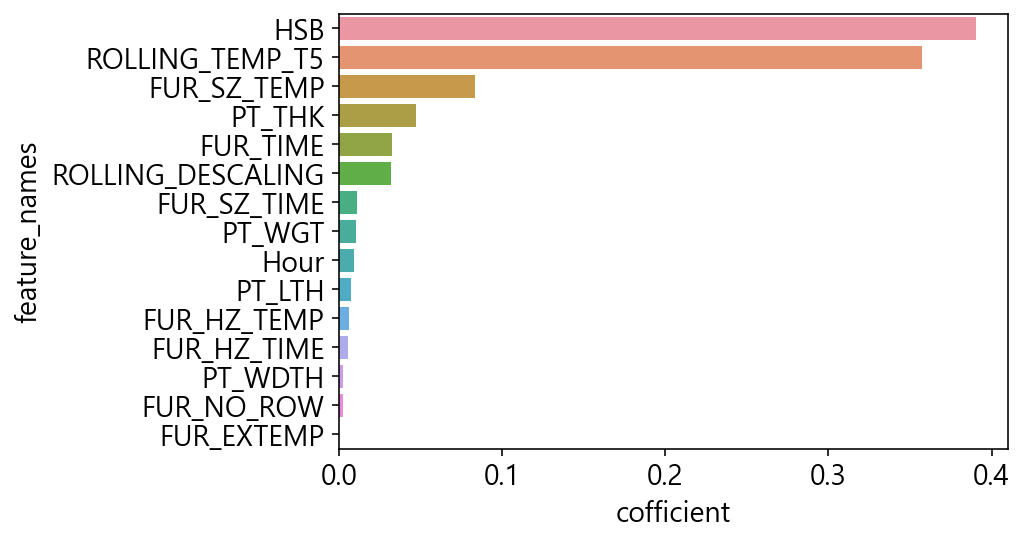

In [68]:
coef_importance = pd.DataFrame({"feature_names" : X_train.columns, "cofficient" : xgbc.feature_importances_}).sort_values(by = 'cofficient', ascending = False)
sns.barplot(data = coef_importance, x = 'cofficient', y = 'feature_names')

In [63]:
# C0의 XGboost
X_train, X_test, Y_train, Y_test = train_test_split(c0_X,c0_Y, test_size = 0.3, random_state = 5)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Total 대한 XGClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train_std, Y_train)

pred_c0_xg = xgbc.predict(X_test_std)

xgbc_c0_train_score = xgbc.score(X_train_std, Y_train)
xgbc_c0_test_score = xgbc.score(X_test_std, Y_test)

print(f'XGBoost 훈련 정확도는 {int(round(xgbc_c0_train_score,2)*100)}% 입니다.')
print(f'XGBOost 테스트 정확도는 {int(round(xgbc_c0_test_score,2)*100)}% 입니다.')

XGBoost 훈련 정확도는 100% 입니다.
XGBOost 테스트 정확도는 99% 입니다.


<AxesSubplot:xlabel='cofficient', ylabel='feature_names'>

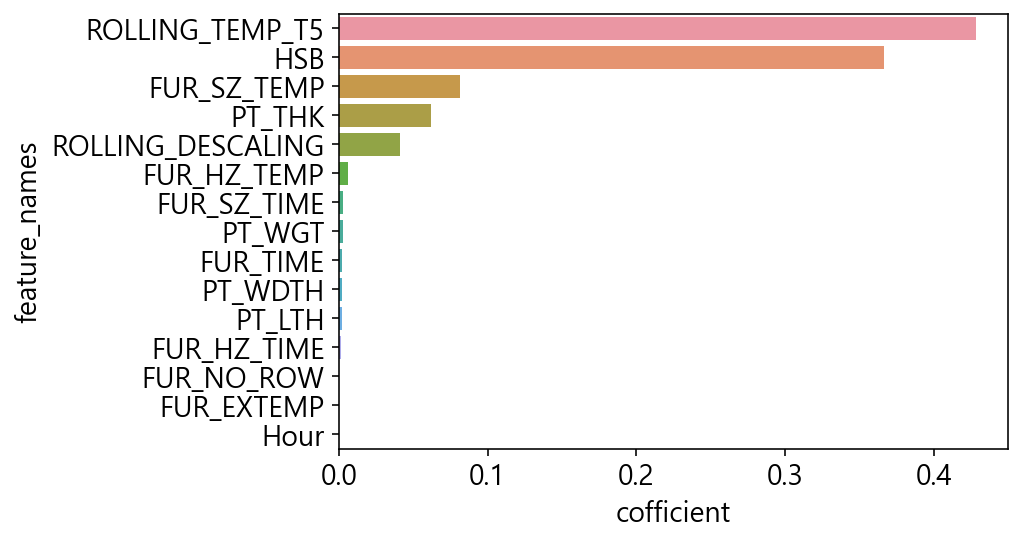

In [64]:
coef_importance = pd.DataFrame({"feature_names" : X_train.columns, "cofficient" : xgbc.feature_importances_}).sort_values(by = 'cofficient', ascending = False)
sns.barplot(data = coef_importance, x = 'cofficient', y = 'feature_names')

In [65]:
# C0 제외한 나머지의 XGboost
X_train, X_test, Y_train, Y_test = train_test_split(c0_except_X,c0_except_Y, test_size = 0.3, random_state = 5)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Total 대한 XGClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train_std, Y_train)

pred_c0_xg = xgbc.predict(X_test_std)

xgbc_c0_excpet_train_score = xgbc.score(X_train_std, Y_train)
xgbc_c0_except_test_score = xgbc.score(X_test_std, Y_test)

print(f'XGBoost 훈련 정확도는 {int(round(xgbc_c0_excpet_train_score,2)*100)}% 입니다.')
print(f'XGBOost 테스트 정확도는 {int(round(xgbc_c0_except_test_score,2)*100)}% 입니다.')

XGBoost 훈련 정확도는 100% 입니다.
XGBOost 테스트 정확도는 97% 입니다.


In [66]:
coef_importance = pd.DataFrame({"feature_names" : X_train.columns, "cofficient" : xgbc.feature_importances_}).sort_values(by = 'cofficient', ascending = False)

<AxesSubplot:xlabel='cofficient', ylabel='feature_names'>

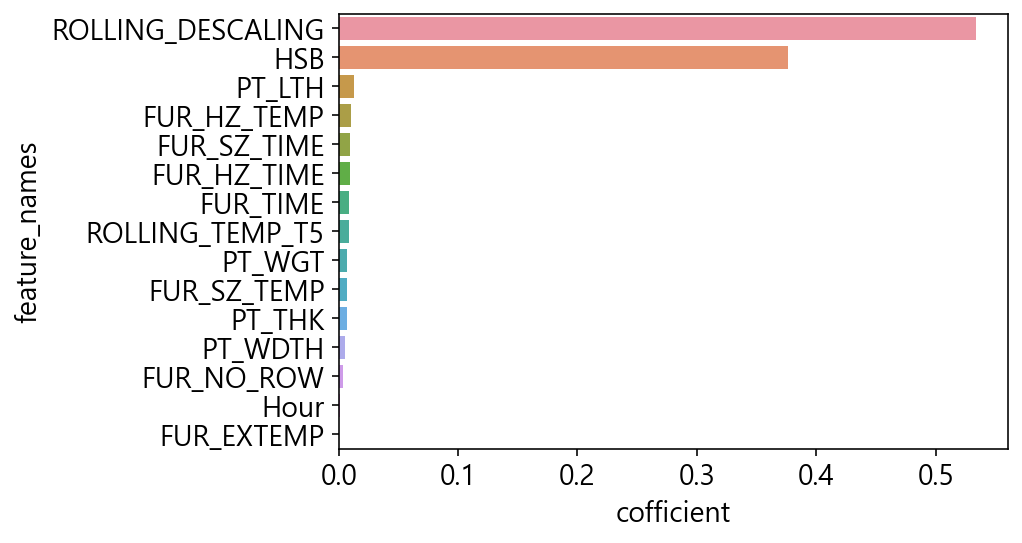

In [61]:
sns.barplot(data = coef_importance, x = 'cofficient', y = 'feature_names')